# Prediction of Genres by Multinomial Naive Bayes algorithm

In [92]:
import wptools
import utils
from sklearn.naive_bayes import MultinomialNB ##naive bayes is classification algorithm
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import requests
from scrapy.http import TextResponse
import time
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.cross_validation import train_test_split

## Scraping part

In [2]:
all_urls=[]
with open("Project_all_urls.txt", "r") as f:
    for line in f:
        all_urls.append((line.strip()))

In [3]:
print(len(all_urls))

9500


In [4]:
need_urls=all_urls[:300]

In [7]:
def genre_scaper(url):
    response=requests.get(url)
    page=TextResponse(url=response.url,body=response.text,encoding="utf-8")
    genre=page.css('div[class="meta-value"]>a::text').extract_first()
    title = page.css('h1[class="mop-ratings-wrap__title mop-ratings-wrap__title--top"]::text').extract_first()
    desc=page.css('div[id="movieSynopsis"]::text').extract()
    return genre,title,desc

In [17]:
all_genres=[]
all_titles = []
all_desc= []
for i in need_urls[:300]:
    genre, title,desc = (genre_scaper(i))
    all_titles.append(title)
    all_genres.append(genre)
    all_desc.extend(desc)
    time.sleep(3)

In [79]:
all_genres

['Drama',
 'Action & Adventure',
 'Action & Adventure',
 'Drama',
 'Animation',
 'Art House & International',
 'Drama',
 'Action & Adventure',
 'Art House & International',
 'Drama',
 'Comedy',
 'Drama',
 'Comedy',
 'Comedy',
 'Drama',
 'Documentary',
 'Drama',
 'Comedy',
 'Comedy',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Comedy',
 'Action & Adventure',
 'Drama',
 'Comedy',
 'Drama',
 'Action & Adventure',
 'Comedy',
 'Action & Adventure',
 'Horror',
 'Drama',
 'Comedy',
 'Drama',
 'Drama',
 'Drama',
 'Horror',
 'Drama',
 'Art House & International',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Comedy',
 'Drama',
 'Drama',
 'Art House & International',
 'Drama',
 'Drama',
 'Comedy',
 'Drama',
 'Documentary',
 'Action & Adventure',
 'Action & Adventure',
 'Comedy',
 'Mystery & Suspense',
 'Drama',
 'Documentary',
 'Musical & Performing Arts',
 'Action & Adventure',
 'Comedy',
 'Documentary',
 'Comedy',
 'Animation',
 'Comedy',
 'Action & Adventure',
 'Art House & International'

In [19]:
len(all_titles)

300

In [21]:
all_desc

['\n                "Love Ranch" is a bittersweet love story that turns explosive when the players in a romantic triangle lose control and cross the line. Set in the late-1970s, the film depicts larger than life personalities living on the edge, Grace Bontempo and Charlie Bontempo, the husband and wife team who own and run Nevada\'s first legalized brothel. Their lives are suddenly altered when Armando Bruza, a husky, world famous heavy weight boxer from South America is brought to the Ranch to train as part of Charlie\'s ever-expanding entrepreneurial empire. Plans quickly go awry when Bruza comes between Grace and Charlie as an unforeseen love triangle develops that erupts into uncontrollable passion and murder.\n            ',
 "\n                From visionary filmmakers James Cameron (AVATAR) and Robert Rodriguez (SIN CITY), comes ALITA: BATTLE ANGEL, an epic adventure of hope and empowerment. When Alita (Rosa Salazar) awakens with no memory of who she is in a future world she doe

In [23]:
df = pd.DataFrame(list(zip(all_titles,all_desc,all_genres)), 
               columns =['Title','Description',"Genre"]) 
df.head()

,Title,Description,Genre
0,Love Ranch,"\n ""Love Ranch"" is a bitterswee...",Drama
1,Alita: Battle Angel,\n From visionary filmmakers Ja...,Action & Adventure
2,UglyDolls,\n In the adorably different to...,Action & Adventure
3,The Red Sea Diving Resort,\n Inspired by remarkable true ...,Drama
4,Rocko's Modern Life: Static Cling,\n After being in space for aro...,Animation


In [24]:
df.to_csv("Genre_sentiment.csv")

In [6]:
df=pd.read_csv("Genre_sentiment.csv")

In [9]:
df.Description

0      \n                "Love Ranch" is a bitterswee...
1      \n                From visionary filmmakers Ja...
2      \n                In the adorably different to...
3      \n                Inspired by remarkable true ...
4      \n                After being in space for aro...
                             ...                        
295    \n                Life has become a balancing ...
296    \n                On the night of November 13,...
297    \n                There are 8,000 miles of roa...
298    \n                American performance artist ...
299    \n                Fifteen years ago, Mel (Made...
Name: Description, Length: 300, dtype: object

In [10]:
data = utils.text_to_df(df.Description)

In [11]:
data.columns

Index(['000', '10', '100', '11', '12', '12th', '13', '1494', '15', '15th',
       ...
       'zequi', 'zero', 'zhangke', 'zhao', 'zhenzhen', 'zoey', 'zombie',
       'zone', 'zoë', 'zukerman'],
      dtype='object', length=6249)

In [12]:
encoder = LabelEncoder()

In [15]:
genres_encoded = encoder.fit_transform(df.Genre)

In [264]:
all_genres

['Drama',
 'Action & Adventure',
 'Action & Adventure',
 'Drama',
 'Animation',
 'Art House & International',
 'Drama',
 'Action & Adventure',
 'Art House & International',
 'Drama',
 'Comedy',
 'Drama',
 'Comedy',
 'Comedy',
 'Drama',
 'Documentary',
 'Drama',
 'Comedy',
 'Comedy',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Comedy',
 'Action & Adventure',
 'Drama',
 'Comedy',
 'Drama',
 'Action & Adventure',
 'Comedy',
 'Action & Adventure',
 'Horror',
 'Drama',
 'Comedy',
 'Drama',
 'Drama',
 'Drama',
 'Horror',
 'Drama',
 'Art House & International',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Comedy',
 'Drama',
 'Drama',
 'Art House & International',
 'Drama',
 'Drama',
 'Comedy',
 'Drama',
 'Documentary',
 'Action & Adventure',
 'Action & Adventure',
 'Comedy',
 'Mystery & Suspense',
 'Drama',
 'Documentary',
 'Musical & Performing Arts',
 'Action & Adventure',
 'Comedy',
 'Documentary',
 'Comedy',
 'Animation',
 'Comedy',
 'Action & Adventure',
 'Art House & International'

## Modeling

In [79]:
model = MultinomialNB(alpha=0.15, fit_prior=False, class_prior=None)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(data, genres_encoded, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(225, 6249)
(75, 6249)
(225,)
(75,)


In [81]:
model.fit(X_train,y_train)

MultinomialNB(alpha=0.15, class_prior=None, fit_prior=False)

In [82]:
predicted_genre=model.predict(X_test)
from sklearn import metrics
metrics.accuracy_score(y_test, predicted_genre)

0.41333333333333333

In [83]:
encoder.inverse_transform(predicted_genre)

C:\Users\arman\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['Art House & International', 'Documentary', 'Documentary', 'Drama',
       'Horror', 'Drama', 'Drama', 'Action & Adventure', 'Comedy',
       'Drama', 'Drama', 'Comedy', 'Drama', 'Drama', 'Drama', 'Drama',
       'Drama', 'Drama', 'Action & Adventure', 'Comedy', 'Drama',
       'Horror', 'Action & Adventure', 'Drama', 'Action & Adventure',
       'Drama', 'Comedy', 'Drama', 'Documentary', 'Action & Adventure',
       'Drama', 'Drama', 'Drama', 'Documentary', 'Comedy',
       'Art House & International', 'Drama', 'Drama', 'Drama', 'Horror',
       'Drama', 'Documentary', 'Action & Adventure', 'Comedy', 'Drama',
       'Action & Adventure', 'Drama', 'Horror', 'Drama', 'Drama', 'Drama',
       'Documentary', 'Drama', 'Drama', 'Drama', 'Drama', 'Comedy',
       'Drama', 'Drama', 'Documentary', 'Drama', 'Comedy', 'Drama',
       'Horror', 'Drama', 'Action & Adventure', 'Drama', 'Drama',
       'Comedy', 'Drama', 'Drama', 'Drama', 'Action & Adventure',
       'Comedy', 'Action & Adven

In [84]:
data.columns

Index(['000', '10', '100', '11', '12', '12th', '13', '1494', '15', '15th',
       ...
       'zequi', 'zero', 'zhangke', 'zhao', 'zhenzhen', 'zoey', 'zombie',
       'zone', 'zoë', 'zukerman'],
      dtype='object', length=6249)

In [85]:
def predict_topic(string):
    your_text=utils.text_to_df([string])
    for i in  data.columns:
        if i not in your_text.columns:
            your_text[i]=0
    for i in your_text.columns:
        if i not in data.columns:
            del your_text[i]
    result=model.predict(your_text)
    result=encoder.inverse_transform(result)
    #print ("Review's topic is ",result)
    return result

In [86]:
predict_topic("What begins as a documentary following the final tour of a dying magician -- 'The Amazing Johnathan' -- becomes an unexpected and increasingly bizarre journey as the filmmaker struggles to separate truth from illusion.")

C:\Users\arman\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['Documentary'], dtype=object)

In [87]:
df.Genre.value_counts()

Drama                        98
Comedy                       52
Action & Adventure           42
Documentary                  38
Horror                       23
Art House & International    22
Mystery & Suspense           12
Animation                     8
Western                       1
Special Interest              1
Science Fiction & Fantasy     1
Sam Liu                       1
Musical & Performing Arts     1
Name: Genre, dtype: int64

## Most frequent words in descriptions by each genre

In [88]:
drama=" ".join(review for review in df[df["Genre"]=="Drama"].Description)
comedy = " ".join(review for review in df[df["Genre"]=="Comedy"].Description)
action_and_adventure = " ".join(review for review in df[df["Genre"]=="Action & Adventure"].Description)
documentary = " ".join(review for review in df[df["Genre"]=="Documentary"].Description)
horror = " ".join(review for review in df[df["Genre"]=="Horror"].Description)
print ("There are {} words in the combination of all descriptions.".format(len(drama)))
print ("There are {} words in the combination of all descriptions.".format(len(comedy)))
print ("There are {} words in the combination of all descriptions.".format(len(action_and_adventure)))
print ("There are {} words in the combination of all descriptions.".format(len(documentary)))
print ("There are {} words in the combination of all descriptions.".format(len(horror)))

There are 50405 words in the combination of all descriptions.
There are 25786 words in the combination of all descriptions.
There are 20554 words in the combination of all descriptions.
There are 25399 words in the combination of all descriptions.
There are 11157 words in the combination of all descriptions.


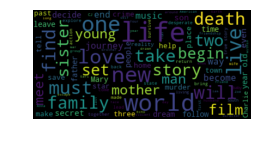

In [89]:
# lower max_font_size, change the maximum number of word and lighten the background:
plt.figure(figsize=(5,2))
wordcloud_1 = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(drama)
plt.imshow(wordcloud_1, interpolation="bilinear")
plt.axis("off")
plt.show()

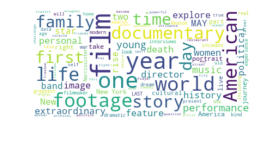

In [90]:
plt.figure(figsize=(5,2))
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(documentary)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()